In [ ]:
import numpy as np
import pandas as pd

In [209]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [210]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5499,ham,Now get step 2 outta the way. Congrats again.,NaN,NaN,NaN
385,ham,It took Mr owl 3 licks,NaN,NaN,NaN
5059,ham,I think i am disturbing her da,NaN,NaN,NaN
5227,ham,I re-met alex nichols from middle school and i...,NaN,NaN,NaN
5482,spam,URGENT We are trying to contact you Last weeke...,NaN,NaN,NaN


In [211]:
df.shape

(5572, 5)

1. Data Cleaning
2. EDA
3. Text Preprocessign
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy

### Data Cleaning

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [213]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [214]:
df.sample(5)

,v1,v2
491,spam,Congrats! 1 year special cinema pass for 2 is ...
331,ham,Maybe i could get book out tomo then return it...
4431,ham,Dont think you need yellow card for uk travel....
3719,ham,"Yeah why not, is the gang all ready"
4253,ham,"How about clothes, jewelry, and trips?"


In [215]:
# renaming cols
df.rename(columns={'v1': 'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
150,ham,The wine is flowing and i'm i have nevering..
2025,ham,"Yes obviously, but you are the eggs-pert and t..."
2552,ham,"Oh fine, I'll be by tonight"
1426,ham,Ok...
2978,spam,"Xmas Offer! Latest Motorola, SonyEricsson & No..."


In [216]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [217]:
df['target'] = encoder.fit_transform(df['target'])

In [218]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [219]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [220]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [221]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [222]:
df.shape

(5169, 2)

### Exploratory Data Analysis

In [223]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [224]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

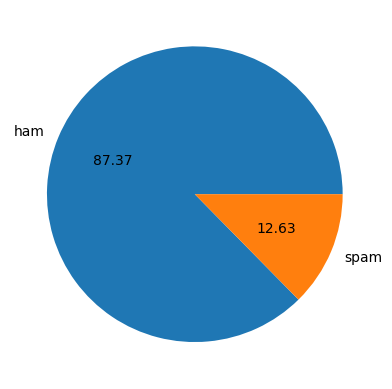

In [225]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [226]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [227]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [228]:
df['num_characters'] = df['text'].apply(len)

In [229]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [230]:
df["num_words"] = df["text"].apply(lambda x: len(x.split()))

In [231]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [232]:
df["num_sentences"] = df["text"].apply(lambda x: len([s.strip() for s in x.split('.') if s.strip()]))

In [233]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [234]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.000387
std,58.236293,11.068488,1.426610
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,30.000000


In [235]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.872896
std,56.358207,11.116240,1.352005
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,30.000000


In [236]:
# spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.882083
std,30.137753,5.967672,1.607078
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [237]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

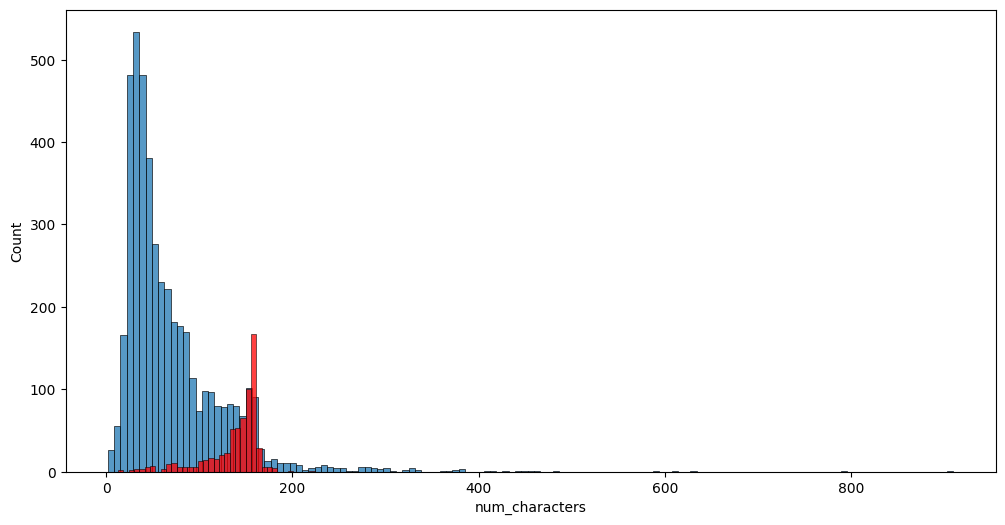

In [238]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='r')

<Axes: xlabel='num_words', ylabel='Count'>

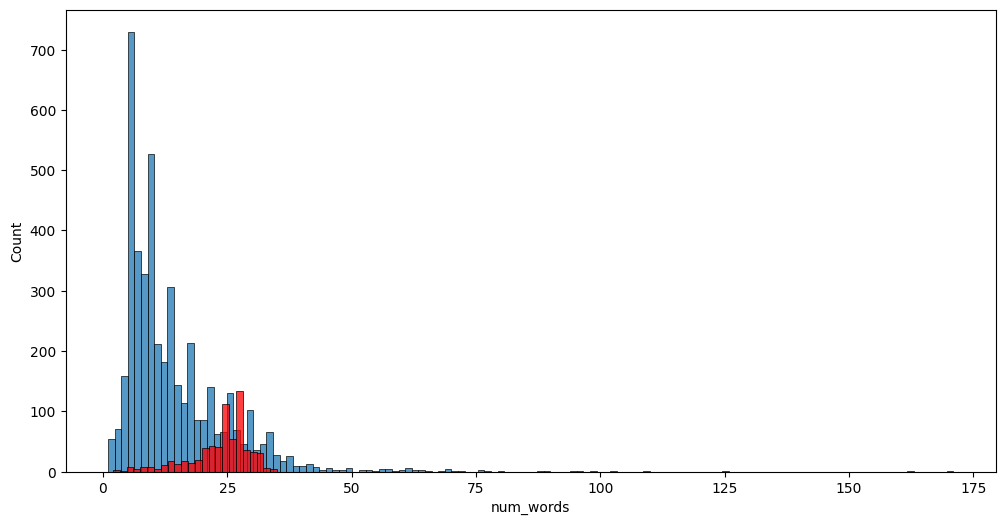

In [239]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='r')

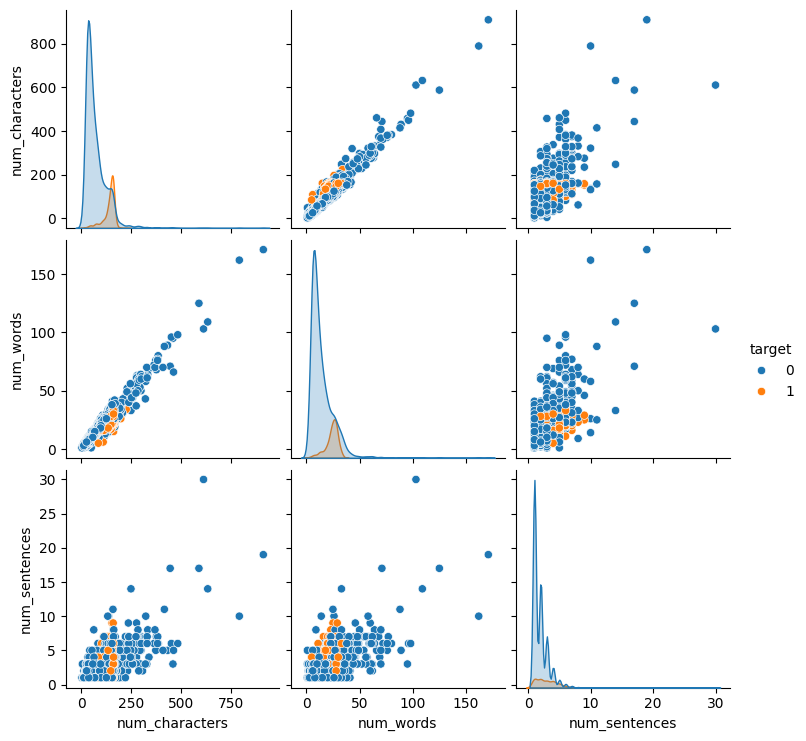

In [240]:
sns.pairplot(df, hue='target')

<Axes: >

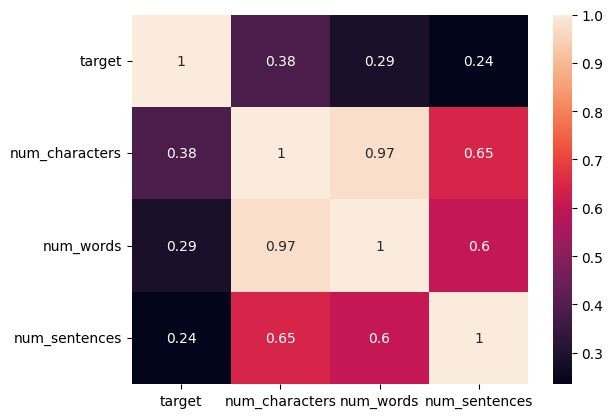

In [241]:
numeric_df = df.select_dtypes(include=[float, int])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True)

### Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [242]:
import nltk
import os

In [243]:
download_dir = "/home/tyreece/nltk_data_fixed" # modify for personal use
os.makedirs(download_dir, exist_ok=True)
nltk.download('stopwords', download_dir=download_dir)
nltk.data.path.append(download_dir)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tyreece/nltk_data_fixed...
[nltk_data]   Package stopwords is already up-to-date!


In [244]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [245]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def tokenize_transform(input):
    cleaned_words = [
        word.strip(string.punctuation)
        for word in input.lower().split()
    ]
    
    return [
        ps.stem(word)
        for word in cleaned_words
        if word and word not in stop_words
    ]

def transform_text(text):
    res = tokenize_transform(text)
    return " ".join(res)

In [246]:
transform_text("I loved the YT lectures on Machine Learning. How about you?")

'love yt lectur machin learn'

In [247]:
df['transformed_text'] = df['text'].apply(transform_text)

In [248]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [249]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [250]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

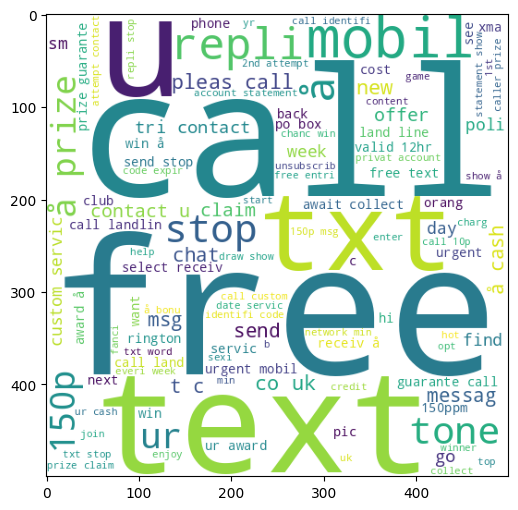

In [251]:
plt.figure(figsize=(10, 6))
plt.imshow(spam_wc)

In [252]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

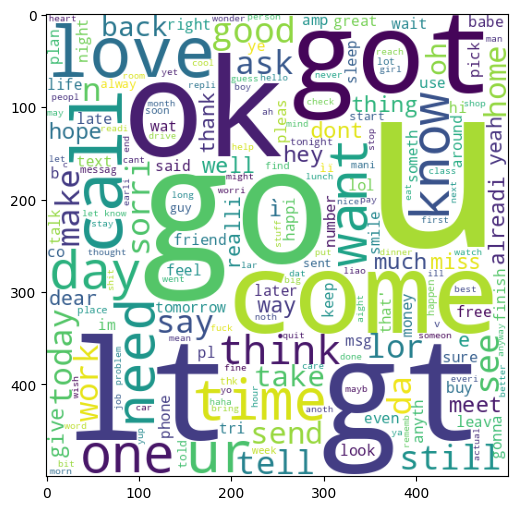

In [253]:
plt.figure(figsize=(10, 6))
plt.imshow(ham_wc)

In [254]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [255]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [256]:
len(spam_corpus)

10776

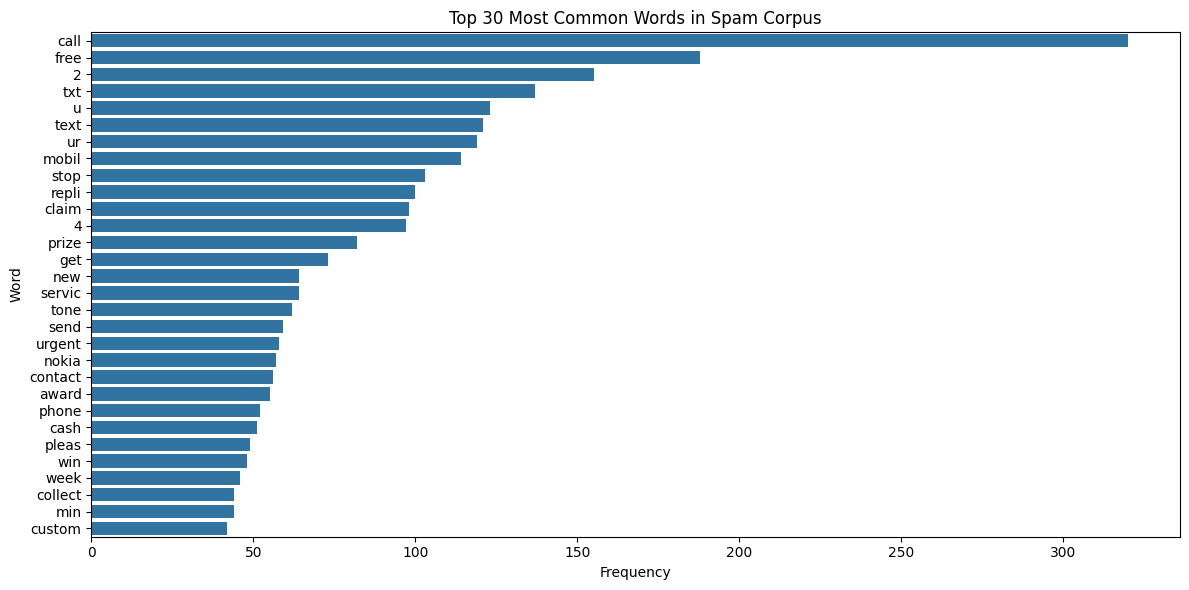

In [257]:
from collections import Counter
common_words = Counter(spam_corpus).most_common(30)
df_common = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=df_common)
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.tight_layout()
plt.show()

In [258]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

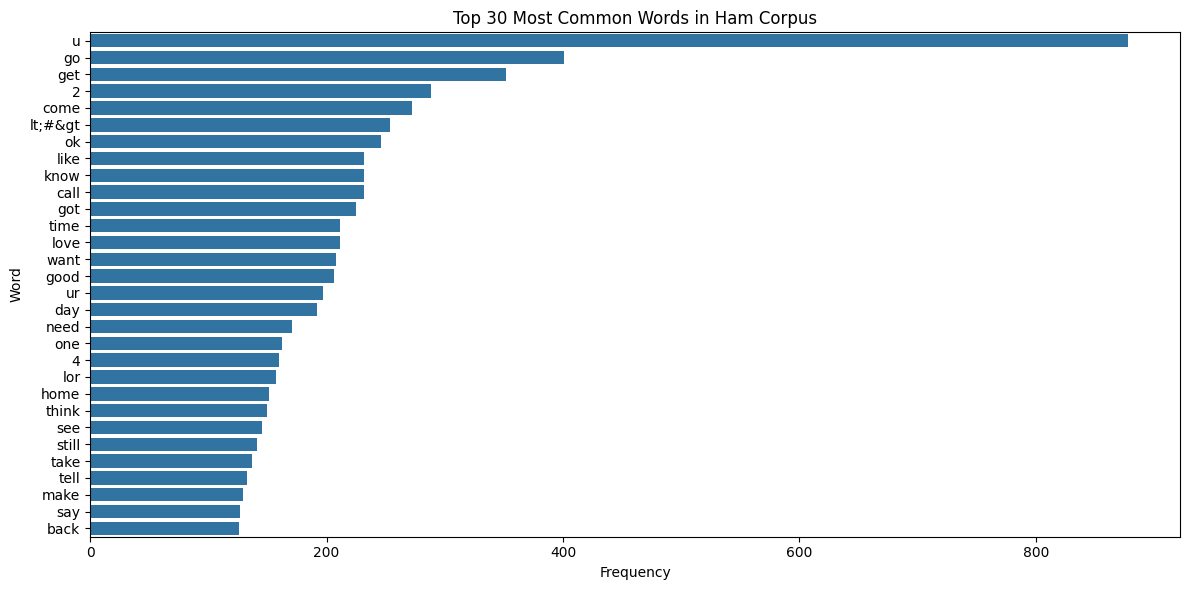

In [259]:
common_words = Counter(ham_corpus).most_common(30)
df_common = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=df_common)
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.tight_layout()
plt.show()

In [260]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


### Model Building

In [261]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

In [262]:
X = cv.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [265]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [266]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [267]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8955512572533849
[[800  96]
 [ 12 126]]
0.5675675675675675


In [268]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9729206963249516
[[879  17]
 [ 11 127]]
0.8819444444444444


In [269]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.97678916827853
[[894   2]
 [ 22 116]]
0.9830508474576272


In [270]:
# Modify Model
tfidf = TfidfVectorizer()

In [271]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [272]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8887814313346228
[[800  96]
 [ 19 119]]
0.5534883720930233


In [273]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.960348162475822
[[896   0]
 [ 41  97]]
1.0


In [274]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.97678916827853
[[894   2]
 [ 22 116]]
0.9830508474576272


In [275]:
# tfidf --> MNB

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [277]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [278]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc, 
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [279]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)

    return acc, prec

In [280]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [281]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For KN
Accuracy -  0.8965183752417795
Precision -  1.0
For NB
Accuracy -  0.960348162475822
Precision -  1.0
For DT
Accuracy -  0.9352030947775629
Precision -  0.8736842105263158
For LR
Accuracy -  0.9516441005802708
Precision -  0.9489795918367347
For RF
Accuracy -  0.9738878143133463
Precision -  1.0
For AdaBoost
Accuracy -  0.9274661508704062
Precision -  0.92
For BgC
Accuracy -  0.9622823984526112
Precision -  0.8778625954198473
For ETC
Accuracy -  0.97678916827853
Precision -  0.975
For GBDT
Accuracy -  0.9516441005802708
Precision -  0.9680851063829787
For xgb
Accuracy -  0.9758220502901354
Precision -  0.959349593495935


In [282]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Accuracy', ascending=False)

In [283]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.976789,0.975000
10,xgb,0.975822,0.959350
5,RF,0.973888,1.000000
0,SVC,0.972921,0.974138
7,BgC,0.962282,0.877863
2,NB,0.960348,1.000000
4,LR,0.951644,0.948980
9,GBDT,0.951644,0.968085
3,DT,0.935203,0.873684
6,AdaBoost,0.927466,0.920000


In [284]:
performance_df.sort_values('Precision', ascending=False)

,Algorithm,Accuracy,Precision
5,RF,0.973888,1.000000
1,KN,0.896518,1.000000
2,NB,0.960348,1.000000
8,ETC,0.976789,0.975000
0,SVC,0.972921,0.974138
9,GBDT,0.951644,0.968085
10,xgb,0.975822,0.959350
4,LR,0.951644,0.948980
6,AdaBoost,0.927466,0.920000
7,BgC,0.962282,0.877863


In [285]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [286]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.976789
1,xgb,Accuracy,0.975822
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.972921
4,BgC,Accuracy,0.962282
5,NB,Accuracy,0.960348
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.951644
8,DT,Accuracy,0.935203
9,AdaBoost,Accuracy,0.927466


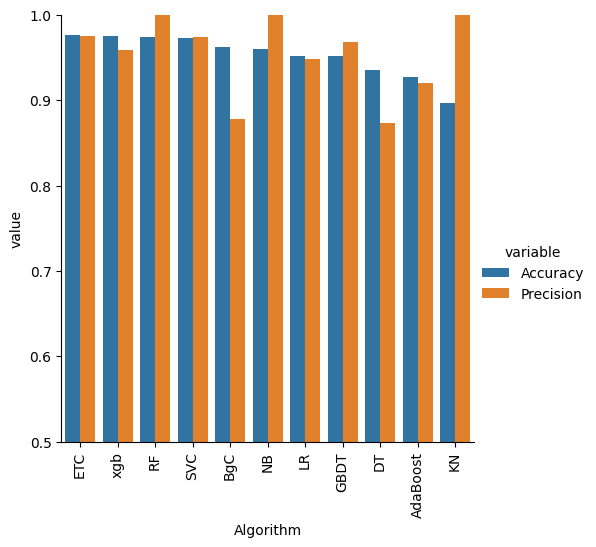

In [287]:
sns.catplot(x = 'Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [288]:
# model improve
# 1. Change the max_features parameter of TfIdf
# 2. Fit transform on X using MinMaxScaler 
#   Improved Accuracy but hurt precision socre, therefore not in place
# 3. Feature augmentation on X
#   Hurt Accuracy but improved precision score, therefore not in place

In [289]:
tfidf = TfidfVectorizer(max_features=3000)

In [290]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [291]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [292]:
#X = np.hstack((X, df['num_characters'].values.reshape(-1, 1)))

In [293]:
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [294]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [295]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)

    return acc, prec

In [296]:
accuracy_scores_ft_3000 = []
precision_scores_ft_3000 = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores_ft_3000.append(current_accuracy)
    precision_scores_ft_3000.append(current_precision)

For SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For KN
Accuracy -  0.9061895551257253
Precision -  1.0
For NB
Accuracy -  0.9758220502901354
Precision -  1.0
For DT
Accuracy -  0.9342359767891683
Precision -  0.8365384615384616
For LR
Accuracy -  0.9555125725338491
Precision -  0.96
For RF
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For AdaBoost
Accuracy -  0.9197292069632496
Precision -  0.8571428571428571
For BgC
Accuracy -  0.9555125725338491
Precision -  0.8333333333333334
For ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For GBDT
Accuracy -  0.9477756286266924
Precision -  0.9565217391304348
For xgb
Accuracy -  0.971953578336557
Precision -  0.957983193277311


In [297]:
performance_df_ft_3000 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores_ft_3000, 'Precision': precision_scores_ft_3000}).sort_values('Accuracy', ascending=False)

In [298]:
performance_df1_ft_3000 = pd.melt(performance_df_ft_3000, id_vars="Algorithm")

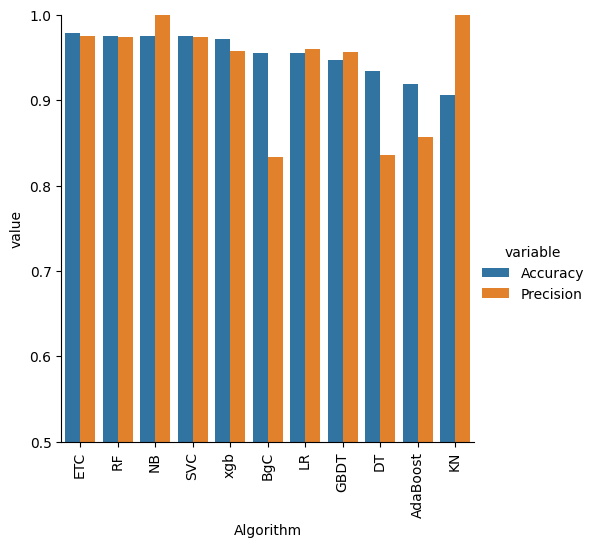

In [299]:
sns.catplot(x = 'Algorithm', y='value', hue='variable', data=performance_df1_ft_3000, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [300]:
temp_df = pd.DataFrame(({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}))

In [301]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,ETC,0.976789,0.975000,0.976789,0.975000
1,xgb,0.975822,0.959350,0.975822,0.959350
2,RF,0.973888,1.000000,0.973888,1.000000
3,SVC,0.972921,0.974138,0.972921,0.974138
4,BgC,0.962282,0.877863,0.962282,0.877863
5,NB,0.960348,1.000000,0.960348,1.000000
6,LR,0.951644,0.948980,0.951644,0.948980
7,GBDT,0.951644,0.968085,0.951644,0.968085
8,DT,0.935203,0.873684,0.935203,0.873684
9,AdaBoost,0.927466,0.920000,0.927466,0.920000


In [302]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [303]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')   # averages predicted probabilities rather than predicted class labels

In [ ]:
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [306]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [307]:
from sklearn.ensemble import StackingClassifier

In [308]:
clf = StackingClassifier(estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

,estimators,"[('svm', ...), ('nb', ...), ...]"
,final_estimator,RandomForestClassifier()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0


In [312]:
mnb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [313]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))